In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform

In [2]:
np.random.seed(42)
p = 0.3
n_estimation = 100
n_cluster = 100
cluster_centers = np.random.rand(n_cluster,2)
binom_sample = stats.binom.rvs(n_estimation, p, size=(n_cluster))

In [3]:
px.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], color=binom_sample)

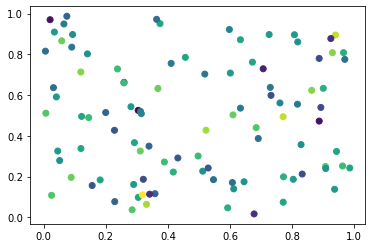

In [4]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=binom_sample)

In [5]:
from BinomialSimilarityGrouping import BSG

In [6]:
epsilon_list = [0.05, 0.1, 0.15, 0.2]
color_list = [f"rgba(0, 0, 255, {1-epsilon*5+0.05})" for epsilon in epsilon_list]
bsg = BSG(n_estimation, p, 0.1, 10)
link_list = []
for epsilon in epsilon_list:
    link_list.append(bsg.fit_epsilon(cluster_centers, binom_sample, epsilon))

In [7]:
connections = np.where(link_list[0])
start_points = connections[0]
end_points = connections[1]

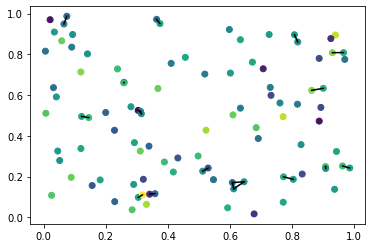

In [8]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c=binom_sample)
for idx_point_1, idx_point_2 in zip(start_points, end_points):
    if idx_point_1 < idx_point_2:
        line = np.array([cluster_centers[idx_point_1],cluster_centers[idx_point_2]])
        plt.plot(line[:,0], line[:,1], c="k")

In [9]:
fig = px.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], color=binom_sample)
for i, color in enumerate(color_list):
    if i > 0:
        connections = np.where(link_list[i] & ~link_list[i-1])
    else:
        connections = np.where(link_list[i])
    start_points = connections[0]
    end_points = connections[1]
    for idx_point_1, idx_point_2 in zip(start_points, end_points):
        if idx_point_1 < idx_point_2:
            line = np.array([cluster_centers[idx_point_1],cluster_centers[idx_point_2]])
            fig.add_trace(go.Scatter(x=line[:,0], y=line[:,1], mode="lines", line_color=color))
fig.update_layout(showlegend=False)
fig.show()

In [19]:
linkage_matrix = bsg.fit_hierarchy(cluster_centers, binom_sample)
labels = bsg.predict_hierarchy(15)

In [20]:
fig = px.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], size=binom_sample, color=labels)
fig.show()